In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re

In [2]:
class months_parser():

    def __init__( self ):
        
        
        self.data = True

    def map_monthname_to_monthnumber(self, month_name: str) -> str:
        """
        Maps a month name to a month number.

        Args:
        month_name: The month name (e.g., "January", "February").

        Returns:
        The month number (e.g., 1, 2).
        """

        month_numbers = {"jan": "01", "feb": "02", "mar": "03","apr": "04","may":
                          "05","jun": "06","jul": "07","aug": "08","sept": 
                          "09","oct": "10","nov": "11","dec": "12"
                        }

        return month_numbers[month_name]

    # def rename_file(self , old_file_name: str, new_file_name : str) -> None:
    #     """
    #     Renames a file.

    #     Args:
    #         old_file_name: The old file name.
    #         new_file_name: The new file name.
    #     """

    #     os.rename(old_file_name, new_file_name)
    #     return

    def map_and_transport ( self, file_name:str , source_folder:str ,
                            destination_folder: str)-> None:


        month_name = re.search(r"(\w+)_", file_name).group(1)

        src_filepath =  source_folder + file_name
        
        month_label = self.map_monthname_to_monthnumber(month_name)
        new_file_name =  month_label + "_" + src_filepath[-6:]
        
        print(month_name, month_label, new_file_name)
        dst_filepath = destination_folder + new_file_name
        os.rename(src_filepath, dst_filepath)
        
        return 

In [3]:
month_manager = months_parser()

In [4]:
os.listdir()

['raw_data_labeled_months',
 'raw_data_indexed_months',
 'sunhours_generation_workflow.ipynb']

In [ ]:


for csv_file in os.listdir():
    if csv_file.endswith('.csv'):
        
    # Extract the month name from the CSV file name.
        month_name = re.search(r"(\w+)_", csv_file).group(1)

        month_label = map_month_name_to_month_number(month_name)
        new_file_name =  month_label + "_" + csv_file[-6:]
        print(month_name, month_label, new_file_name)
        rename_file(csv_file, new_file_name)
    else:
        pass

In [7]:
import datetime

def convert_timedelta_to_hours(timedelta):
  """Converts a timedelta to a number of hours.

  Args:
    timedelta: A timedelta object.

  Returns:
    The number of hours in the timedelta.
  """

  total_seconds = timedelta.total_seconds()
  hours = total_seconds / 3600.0

  return hours

def round_to_next_10th_minutes(time_string):
    """Rounds a time string to the next 10th minutes.

    Args:
    time_string: A time string in the format "HH:MM".

    Returns:
    A time string rounded to the next 10th minutes.
    """

    hours, minutes = time_string.split(":")
    minutes = int(minutes)

    # Round the minutes up to the next 10th minute.
    minutes_dec = (minutes // 10) * 10 #+ 10
    rem_ = minutes%10

    # If the minutes are greater than 59, then increment the hours and set the minutes to 0.
    if minutes > 55:
        hours = int(hours) + 1
        minutes =  0 #minutes_dec +10
        
    elif rem_ >5 :
        hours = int(hours)
        minutes = minutes_dec + 10
    
    else:
        hours = int(hours)
        minutes = minutes_dec
        

    # Return the rounded time string.
    return f"{hours:02d}:{minutes:02d}"


In [180]:
df_ =  pd.read_csv("/home/rockefeller/Documents/PhDlife/DS_ResearchGroup/Year24/07_24/data/climate_data/clean_data/df_all2022_10min.csv")
df_.head()

,date_time,WS_10_mean,WS_40a_mean,WS_20_mean,WD_20_mean,WS_60_mean,WD_60_mean,Tair_mean,Pbaro_mean
0,2022-01-01 00:10:00,5.8658,8.3060,7.3084,278.22,9.0416,280.12,13.90,981.0
1,2022-01-01 00:20:00,6.0581,8.3122,7.4574,281.72,8.8559,282.62,14.12,981.0
2,2022-01-01 00:30:00,6.2690,8.9631,7.6870,276.82,9.4875,279.52,14.04,981.0
3,2022-01-01 00:40:00,6.1263,8.3556,7.3891,271.62,9.1036,276.22,13.85,981.1
4,2022-01-01 00:50:00,5.2518,7.4630,6.3962,275.12,8.1128,278.82,13.81,981.0


In [199]:
df_ =  pd.read_csv("/home/rockefeller/Documents/PhDlife/DS_ResearchGroup/Year24/07_24/data/climate_data/clean_data/df_all2021_10min.csv")
df_.head()

,date_time,WS_10_mean,WS_40a_mean,WS_20_mean,WD_20_mean,WS_60_mean,WD_60_mean,Tair_mean,Pbaro_mean
0,2021-01-01 00:10:00,4.3724,6.7564,5.4281,226.52,7.8961,225.62,15.18,987.0
1,2021-01-01 00:20:00,5.1774,7.4940,6.2100,225.92,8.1871,223.92,15.02,987.1
2,2021-01-01 00:30:00,3.6802,5.8390,4.7716,218.52,6.4223,213.92,14.87,987.1
3,2021-01-01 00:40:00,3.2144,5.4609,4.2056,210.12,6.3170,211.62,14.85,987.2
4,2021-01-01 00:50:00,3.1909,5.6593,4.3378,212.22,6.5771,211.32,14.83,987.2


In [84]:
df1.loc[18000,:]

WS_10_mean    NaN
WS_40a_mean   NaN
WS_20_mean    NaN
WD_20_mean    NaN
WS_60_mean    NaN
WD_60_mean    NaN
Tair_mean     NaN
Pbaro_mean    NaN
Name: 18000, dtype: float64

In [85]:
df1 = df1.apply(lambda x: x.fillna(x.mean()), axis=0)
df1 

,WS_10_mean,WS_40a_mean,WS_20_mean,WD_20_mean,WS_60_mean,WD_60_mean,Tair_mean,Pbaro_mean
17279,3.5431,5.4113,4.5078,273.72,5.9145,267.32,13.62,992.3
17280,3.4408,5.4237,4.4991,273.72,6.1746,269.42,13.54,992.3
17281,3.6002,5.8700,4.8528,273.12,6.4718,269.12,13.61,992.3
17282,3.1853,5.5043,4.1795,281.22,6.1560,273.72,13.59,992.2
17283,2.7170,5.0531,3.6210,285.52,5.9083,276.42,13.55,992.2
...,...,...,...,...,...,...,...,...
21738,5.1042,8.6593,6.8492,282.12,10.0943,283.42,12.26,993.9
21739,5.3262,8.9321,7.1471,284.32,10.2368,285.82,12.38,993.7
21740,5.3759,8.8887,7.1657,284.92,9.8095,286.52,12.39,993.7
21741,5.3945,9.0623,7.5008,279.82,9.7723,281.82,12.40,993.7


In [86]:
df1.index

Index([17279, 17280, 17281, 17282, 17283, 17284, 17285, 17286, 17287, 17288,
       ...
       21733, 21734, 21735, 21736, 21737, 21738, 21739, 21740, 21741, 21742],
      dtype='int64', length=4464)

In [88]:
df1.loc[18000,:].to_dict()

{'WS_10_mean': 5.083243535738293,
 'WS_40a_mean': 6.960659690790948,
 'WS_20_mean': 6.042627268653373,
 'WD_20_mean': 214.9555326013892,
 'WS_60_mean': 7.4923071476585275,
 'WD_60_mean': 215.51144476809324,
 'Tair_mean': 14.79188438270222,
 'Pbaro_mean': 985.6791171857495}

In [90]:
df_.at[18000,'WS_10_mean']

np.float64(nan)

In [91]:
# Update the row using the dictionary
for key, value in df1.loc[18000,:].to_dict().items():
    df_.at[18000, key] = value

In [92]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57024 entries, 0 to 57023
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date_time    57024 non-null  object 
 1   WS_10_mean   57024 non-null  float64
 2   WS_40a_mean  57024 non-null  float64
 3   WS_20_mean   57024 non-null  float64
 4   WD_20_mean   57024 non-null  float64
 5   WS_60_mean   57024 non-null  float64
 6   WD_60_mean   57024 non-null  float64
 7   Tair_mean    57010 non-null  float64
 8   Pbaro_mean   57024 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.9+ MB


In [93]:
df_.to_csv('/home/rockefeller/Documents/PhDlife/DS_ResearchGroup/Year24/07_24/data/climate_data/clean_data/df_all2022_10min.csv', index=False)

In [72]:
df_.iloc[:11313,:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11313 entries, 0 to 11312
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date_time    11313 non-null  object 
 1   WS_10_mean   11313 non-null  float64
 2   WS_40a_mean  11313 non-null  float64
 3   WS_20_mean   11313 non-null  float64
 4   WD_20_mean   11272 non-null  float64
 5   WS_60_mean   11313 non-null  float64
 6   WD_60_mean   11313 non-null  float64
 7   Tair_mean    11310 non-null  float64
 8   Pbaro_mean   11312 non-null  float64
dtypes: float64(8), object(1)
memory usage: 795.6+ KB


In [215]:
import warnings
warnings.filterwarnings('ignore')

class sunshine_data_parser():
    def __init__(self ):
        #self.file_path =  file_path
        self.data_in_folder = True


    def tidy_Sunhours_data(self , file_path ) -> pd.DataFrame:

        data_frame = pd.read_csv(file_path)
        month_year = file_path.split("/")[-1].split(".")[0]
        month_id =  file_path.split("/")[-1].split("_")[1][:2]

        data_frame['Date'] = pd.date_range(data_frame.columns[0]+ "20"+
                                        month_id, periods=data_frame.shape[0])
        
        data_frame = data_frame.iloc[:, [1, 2 , 3, -1]]
        data_frame = data_frame[[data_frame.columns[-1]] + list(data_frame.columns[0:3])]
    
        data_frame['rise_adj'] = pd.to_datetime(data_frame['Sunrise'].str[:5].apply(self.round_to_next_10th_minutes).str[:]+ ":00").dt.time
        data_frame['set_adj'] = pd.to_datetime(data_frame['Sunset'].str[:5].apply(self.round_to_next_10th_minutes).str[:]+ ":00").dt.time

        data_frame['Sunrise'] = pd.to_timedelta(data_frame['Sunrise'].str[:5]+":00")
        data_frame['Sunset'] = pd.to_timedelta(data_frame['Sunset'].str[:5]+":00")
        
        data_frame["calc_length"] = data_frame['Sunset']-data_frame['Sunrise']
        data_frame['calc_length'] = data_frame['calc_length'].apply(self.convert_timedelta_to_hours)
        
        data_frame["adj_length"] = pd.to_timedelta(data_frame['set_adj'].astype(str))- pd.to_timedelta(data_frame['rise_adj'].astype(str))
        data_frame['adj_length'] = data_frame['adj_length'].apply(self.convert_timedelta_to_hours)
        return  data_frame , month_year
    
    def convert_timedelta_to_hours(self, timedelta):
        """Converts a timedelta to a number of hours.

        Args:
            timedelta: A timedelta object.

        Returns:
            The number of hours in the timedelta.
        """

        total_seconds = timedelta.total_seconds()
        hours = total_seconds / 3600.0

        return hours

    def round_to_next_10th_minutes(self, time_string):
        """Rounds a time string to the next 10th minutes.

        Args:
        time_string: A time string in the format "HH:MM".

        Returns:
        A time string rounded to the next 10th minutes.
        """

        hours, minutes = time_string.split(":")
        minutes = int(minutes)

        # Round the minutes up to the next 10th minute.
        minutes_dec = (minutes // 10) * 10 #+ 10
        rem_ = minutes%10

        # If the minutes are greater than 59, then increment the hours and set the minutes to 0.
        if minutes > 55:
            hours = int(hours) + 1
            minutes =  0 #minutes_dec +10
            
        elif rem_ >5 :
            hours = int(hours)
            minutes = minutes_dec + 10
        
        else:
            hours = int(hours)
            minutes = minutes_dec
            

        # Return the rounded time string.
        return f"{hours:02d}:{minutes:02d}"
    
    def generate_date_range(self, date_str):
        # Parse the input string
        month, year = date_str.split('_')
        month = int(month)
        year = int('20' + year)  # Assuming the format is MM_YY for years 2000-2099
        
        # Generate the start and end dates
        start_date = pd.Timestamp(year=year, month=month, day=1)
        end_date = (start_date + pd.offsets.MonthEnd(0)) + pd.DateOffset(days=1) - pd.DateOffset(seconds=1)
        
        # Create the date range with 10-minute frequency
        date_range = pd.date_range(start=start_date, end=end_date, freq='10min')
        
        # Create a DataFrame with the date range
        df = pd.DataFrame(date_range, columns=['Date'])
        
        return df

    def monthly_length_of_day_generator(self , file_path) -> pd.DataFrame:

        data_frame , month_year =  self.tidy_Sunhours_data(file_path)
        restored_date_column = self.generate_date_range(month_year)
        t_grid ="10min"
        n= int((60/int(t_grid[:2]))*24 -1)
        list_alldf = []
        for ind_ in range(data_frame.shape[0]):
            df_within = pd.DataFrame()
            df_within['time'] = pd.date_range(str(data_frame['rise_adj'].values[ind_]) , str(data_frame['set_adj'].values[ind_]), freq='10min' )
            df_within['time'] =  df_within['time'].dt.time
            df_within['t_index'] = pd.Series(np.tile(np.arange(1, n + 1), len(df_within)//n + 1)[:len(df_within)]).values

            df_bef =pd.DataFrame()
            df_bef['time'] = pd.date_range("00:00:00" , str(df_within.iloc[0,0]) , inclusive='left' , freq="10min")
            df_bef['time'] = df_bef['time'].dt.time
            df_bef['t_index'] =  np.zeros(df_bef.shape[0])
            df_aft =pd.DataFrame()
            df_aft['time'] = pd.date_range(str(df_within.iloc[-1,0]) , "23:50:00" , inclusive='right' , freq="10min")
            df_aft['time'] = df_aft['time'].dt.time
            df_aft['t_index'] =  np.zeros(df_aft.shape[0])
            list_alldf.append(df_bef)
            list_alldf.append(df_within)
            list_alldf.append(df_aft)
    
        df_total= pd.concat(list_alldf, axis = 0)
        df_total['time_ofDay_cos'] = np.cos(2*np.deg2rad(180)* df_total['t_index']/(24*int((60/int(t_grid[:2])))))
        df_total['time_ofDay_sin'] = np.sin(2*np.deg2rad(180)* df_total['t_index']/(24*int((60/int(t_grid[:2])))))
        df_total = df_total.reset_index(drop=True)
        df_total['time'] = restored_date_column.iloc[:,0]
        df_total = df_total.rename(columns={'time':'date_time'})
        return df_total 
    
    def yearly_length_of_day_generator( self , folder_path):
        #os.makedirs("./../"+ folder_path "results/pretrained_models/",  exist_ok=True)
        df_list = []
        for file in os.listdir(folder_path):
            if file.endswith('.csv'):
                file_path = folder_path + file
                df = self.monthly_length_of_day_generator(file_path)
                df= df.reset_index(drop=True)
                df_list.append(df)
        df_total = pd.concat(df_list, axis = 0)
        df_total =  df_total.sort_values(by='date_time')
        df_total.to_csv('df_all_sunshours_' + folder_path.split("/")[-2] + '.csv', index=False)
        print(f" Done with the sunshine data for the {folder_path.split('/')[-2]}")
        return df_total


In [216]:
tidier =  sunshine_data_parser()

In [220]:
df_tidy =  tidier.monthly_length_of_day_generator(file_path="/home/rockefeller/Documents/PhDlife/DS_ResearchGroup/Year24/07_24/data/sunhours_data/raw_data_indexed_months/year_21/12_21.csv")
df_tidy.tail()

,date_time,t_index,time_ofDay_cos,time_ofDay_sin
4459,2021-12-31 23:10:00,0.0,1.0,0.0
4460,2021-12-31 23:20:00,0.0,1.0,0.0
4461,2021-12-31 23:30:00,0.0,1.0,0.0
4462,2021-12-31 23:40:00,0.0,1.0,0.0
4463,2021-12-31 23:50:00,0.0,1.0,0.0


In [222]:
df_tidy =  tidier.monthly_length_of_day_generator(file_path="/home/rockefeller/Documents/PhDlife/DS_ResearchGroup/Year24/07_24/data/sunhours_data/raw_data_indexed_months/year_22/01_22.csv")
df_tidy.head()

,date_time,t_index,time_ofDay_cos,time_ofDay_sin
0,2022-01-01 00:00:00,0.0,1.0,0.0
1,2022-01-01 00:10:00,0.0,1.0,0.0
2,2022-01-01 00:20:00,0.0,1.0,0.0
3,2022-01-01 00:30:00,0.0,1.0,0.0
4,2022-01-01 00:40:00,0.0,1.0,0.0


In [219]:
dfx = pd.read_csv("/home/rockefeller/Documents/PhDlife/DS_ResearchGroup/Year24/07_24/data/sunhours_data/raw_data_indexed_months/year_21/12_21.csv")
dfx.tail()

,Dec,Sunrise,Sunset,Length,Diff.,Start,End,Start.1,End.1,Start.2,End.2,Time,Mil. km
26,27,05:27 ↑ (119°),19:55 ↑ (241°),14:27:12,−0:17,03:42,21:40,04:22,21:00,04:58,20:24,12:41 (78.8°),147.122
27,28,05:28 ↑ (119°),19:55 ↑ (241°),14:26:51,−0:20,03:43,21:40,04:22,21:00,04:59,20:24,12:41 (78.8°),147.118
28,29,05:29 ↑ (119°),19:55 ↑ (241°),14:26:27,−0:23,03:43,21:40,04:23,21:01,04:59,20:24,12:42 (78.7°),147.114
29,30,05:29 ↑ (119°),19:55 ↑ (241°),14:26:00,−0:26,03:44,21:41,04:24,21:01,05:00,20:25,12:42 (78.7°),147.111
30,31,05:30 ↑ (119°),19:56 ↑ (241°),14:25:30,−0:30,03:45,21:41,04:25,21:01,05:01,20:25,12:43 (78.6°),147.109


In [218]:
df_full22 =  tidier.yearly_length_of_day_generator(folder_path ="/home/rockefeller/Documents/PhDlife/DS_ResearchGroup/Year24/07_24/data/sunhours_data/raw_data_indexed_months/year_22/")

df_full21 =  tidier.yearly_length_of_day_generator(folder_path ="/home/rockefeller/Documents/PhDlife/DS_ResearchGroup/Year24/07_24/data/sunhours_data/raw_data_indexed_months/year_21/")

df_full20 =  tidier.yearly_length_of_day_generator(folder_path ="/home/rockefeller/Documents/PhDlife/DS_ResearchGroup/Year24/07_24/data/sunhours_data/raw_data_indexed_months/year_20/")


 Done with the sunshine data for the year_22
 Done with the sunshine data for the year_21
 Done with the sunshine data for the year_20


In [174]:
folder_path ="/home/rockefeller/Documents/PhDlife/DS_ResearchGroup/Year24/07_24/data/sunhours_data/raw_data_indexed_months/year_22/"
for file in os.listdir(folder_path):
            if file.endswith('.csv'):
                    print(file)

07_22.csv
03_22.csv
09_22.csv
08_22.csv
04_22.csv
10_22.csv
11_22.csv
02_22.csv
06_22.csv
05_22.csv
01_22.csv
12_22.csv


In [111]:
df= pd.read_csv("/home/rockefeller/Documents/PhDlife/DS_ResearchGroup/Year24/07_24/data/sunhours_data/raw_data_indexed_months/year_22/02_22.csv")
df.shape

(28, 13)

In [128]:
import pandas as pd

def generate_date_range(date_str):
    # Parse the input string
    month, year = date_str.split('_')
    month = int(month)
    year = int('20' + year)  # Assuming the format is MM_YY for years 2000-2099
    
    # Generate the start and end dates
    start_date = pd.Timestamp(year=year, month=month, day=1)
    end_date = (start_date + pd.offsets.MonthEnd(0)) + pd.DateOffset(days=1) - pd.DateOffset(seconds=1)
    
    # Create the date range with 10-minute frequency
    date_range = pd.date_range(start=start_date, end=end_date, freq='10min')
    
    # Create a DataFrame with the date range
    df = pd.DataFrame(date_range, columns=['Date'])
    
    return df

# Example usage
date_str = "05_22"
df = generate_date_range(date_str)
df


,Date
0,2022-05-01 00:00:00
1,2022-05-01 00:10:00
2,2022-05-01 00:20:00
3,2022-05-01 00:30:00
4,2022-05-01 00:40:00
...,...
4459,2022-05-31 23:10:00
4460,2022-05-31 23:20:00
4461,2022-05-31 23:30:00
4462,2022-05-31 23:40:00


In [9]:
def tidy_Sunhours_data_Nappend( data_frame , file_name ):
    
    data_frame['Date'] = pd.date_range(data_frame.columns[0]+ "20"+
                                       file_name.split("_")[1][:2] , periods=data_frame.shape[0])
    data_frame = data_frame.iloc[:, [1, 2 , 3, -1]]
    data_frame = data_frame[[data_frame.columns[-1]] + list(data_frame.columns[0:3])]
    
    data_frame['rise_adj'] = pd.to_datetime(data_frame['Sunrise'].str[:5].apply(round_to_next_10th_minutes).str[:]+ ":00").dt.time
    data_frame['set_adj'] = pd.to_datetime(data_frame['Sunset'].str[:5].apply(round_to_next_10th_minutes).str[:]+ ":00").dt.time

    data_frame['Sunrise'] = pd.to_timedelta(data_frame['Sunrise'].str[:5]+":00")
    data_frame['Sunset'] = pd.to_timedelta(data_frame['Sunset'].str[:5]+":00")
    
    data_frame["calc_length"] = data_frame['Sunset']-data_frame['Sunrise']
    data_frame['calc_length'] = data_frame['calc_length'].apply(convert_timedelta_to_hours)
    
    data_frame["adj_length"] = pd.to_timedelta(data_frame['set_adj'].astype(str))- pd.to_timedelta(data_frame['rise_adj'].astype(str))
    data_frame['adj_length'] = data_frame['adj_length'].apply(convert_timedelta_to_hours)
    
    
    #data_frame.to_csv('tidy_data/'+file_name  , index=False)
    return data_frame

In [12]:
file_path =  "/home/rockefeller/Documents/PhDlife/DS_ResearchGroup/Year24/07_24/data/sunhours_data/raw_data_indexed_months/year_20/12_20.csv"


data_frame = pd.read_csv(file_path)
data_frame.head()

,Dec,Sunrise,Sunset,Length,Diff.,Start,End,Start.1,End.1,Start.2,End.2,Time,Mil. km
0,1,05:20 ↑ (117°),19:38 ↑ (242°),14:17:31,+1:02,03:38,21:21,04:16,20:42,04:52,20:07,12:29 (77.4°),147.497
1,2,05:20 ↑ (118°),19:39 ↑ (242°),14:18:31,+1:00,03:37,21:22,04:16,20:43,04:51,20:08,12:29 (77.6°),147.474
2,3,05:20 ↑ (118°),19:40 ↑ (242°),14:19:28,+0:57,03:37,21:23,04:16,20:44,04:51,20:09,12:30 (77.7°),147.452
3,4,05:20 ↑ (118°),19:41 ↑ (242°),14:20:23,+0:54,03:37,21:24,04:16,20:45,04:51,20:10,12:30 (77.9°),147.430
4,5,05:20 ↑ (118°),19:41 ↑ (242°),14:21:14,+0:51,03:36,21:25,04:15,20:46,04:51,20:10,12:31 (78.0°),147.409


In [14]:
data_frame['Date'] = pd.date_range(data_frame.columns[0]+ "20"+
                                    file_path.split("/")[-1].split("_")[1][:2] , periods=data_frame.shape[0])
data_frame = data_frame.iloc[:, [1, 2 , 3, -1]]
data_frame = data_frame[[data_frame.columns[-1]] + list(data_frame.columns[0:3])]

data_frame['rise_adj'] = pd.to_datetime(data_frame['Sunrise'].str[:5].apply(round_to_next_10th_minutes).str[:]+ ":00").dt.time
data_frame['set_adj'] = pd.to_datetime(data_frame['Sunset'].str[:5].apply(round_to_next_10th_minutes).str[:]+ ":00").dt.time

data_frame['Sunrise'] = pd.to_timedelta(data_frame['Sunrise'].str[:5]+":00")
data_frame['Sunset'] = pd.to_timedelta(data_frame['Sunset'].str[:5]+":00")

data_frame["calc_length"] = data_frame['Sunset']-data_frame['Sunrise']
data_frame['calc_length'] = data_frame['calc_length'].apply(convert_timedelta_to_hours)

data_frame["adj_length"] = pd.to_timedelta(data_frame['set_adj'].astype(str))- pd.to_timedelta(data_frame['rise_adj'].astype(str))
data_frame['adj_length'] = data_frame['adj_length'].apply(convert_timedelta_to_hours)
data_frame.head()

/tmp/ipykernel_116005/1568406396.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_frame['rise_adj'] = pd.to_datetime(data_frame['Sunrise'].str[:5].apply(round_to_next_10th_minutes).str[:]+ ":00").dt.time
/tmp/ipykernel_116005/1568406396.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_frame['set_adj'] = pd.to_datetime(data_frame['Sunset'].str[:5].apply(round_to_next_10th_minutes).str[:]+ ":00").dt.time


,Date,Sunrise,Sunset,Length,rise_adj,set_adj,calc_length,adj_length
0,2020-12-01,0 days 05:20:00,0 days 19:38:00,14:17:31,05:20:00,19:40:00,14.300000,14.333333
1,2020-12-02,0 days 05:20:00,0 days 19:39:00,14:18:31,05:20:00,19:40:00,14.316667,14.333333
2,2020-12-03,0 days 05:20:00,0 days 19:40:00,14:19:28,05:20:00,19:40:00,14.333333,14.333333
3,2020-12-04,0 days 05:20:00,0 days 19:41:00,14:20:23,05:20:00,19:40:00,14.350000,14.333333
4,2020-12-05,0 days 05:20:00,0 days 19:41:00,14:21:14,05:20:00,19:40:00,14.350000,14.333333


In [16]:
data_frame.tail()

,Date,Sunrise,Sunset,Length,rise_adj,set_adj,calc_length,adj_length
26,2020-12-27,0 days 05:28:00,0 days 19:55:00,14:27:07,05:30:00,19:50:00,14.450000,14.333333
27,2020-12-28,0 days 05:28:00,0 days 19:55:00,14:26:45,05:30:00,19:50:00,14.450000,14.333333
28,2020-12-29,0 days 05:29:00,0 days 19:55:00,14:26:21,05:30:00,19:50:00,14.433333,14.333333
29,2020-12-30,0 days 05:30:00,0 days 19:55:00,14:25:53,05:30:00,19:50:00,14.416667,14.333333
30,2020-12-31,0 days 05:30:00,0 days 19:56:00,14:25:22,05:30:00,20:00:00,14.433333,14.500000


In [25]:
31*24*6

4464

In [26]:
data_frame

,Date,Sunrise,Sunset,Length,rise_adj,set_adj,calc_length,adj_length
0,2020-12-01,0 days 05:20:00,0 days 19:38:00,14:17:31,05:20:00,19:40:00,14.300000,14.333333
1,2020-12-02,0 days 05:20:00,0 days 19:39:00,14:18:31,05:20:00,19:40:00,14.316667,14.333333
2,2020-12-03,0 days 05:20:00,0 days 19:40:00,14:19:28,05:20:00,19:40:00,14.333333,14.333333
3,2020-12-04,0 days 05:20:00,0 days 19:41:00,14:20:23,05:20:00,19:40:00,14.350000,14.333333
4,2020-12-05,0 days 05:20:00,0 days 19:41:00,14:21:14,05:20:00,19:40:00,14.350000,14.333333
5,2020-12-06,0 days 05:20:00,0 days 19:42:00,14:22:03,05:20:00,19:40:00,14.366667,14.333333
6,2020-12-07,0 days 05:20:00,0 days 19:43:00,14:22:49,05:20:00,19:40:00,14.383333,14.333333
7,2020-12-08,0 days 05:20:00,0 days 19:44:00,14:23:32,05:20:00,19:40:00,14.400000,14.333333
8,2020-12-09,0 days 05:20:00,0 days 19:45:00,14:24:12,05:20:00,19:40:00,14.416667,14.333333
9,2020-12-10,0 days 05:21:00,0 days 19:45:00,14:24:49,05:20:00,19:40:00,14.400000,14.333333


In [24]:
data_frame.shape

(31, 8)

In [ ]:
pd.date_range?

In [ ]:
pd.date_range(str(data_frame['rise_adj'].values[0]) , str(data_frame['set_adj'].values[0]), freq='10min' )

In [38]:
df_within = pd.DataFrame()
df_within['time'] = pd.date_range(str(data_frame['rise_adj'].values[0]) , str(data_frame['set_adj'].values[0]), freq='10min' )
df_within['time'] =  df_within['time'].dt.time
df_within['t_index'] = pd.Series(np.tile(np.arange(1, n + 1), len(df_within)//n + 1)[:len(df_within)]).values
df_within#.head(60)

,time,t_index
0,05:20:00,1
1,05:30:00,2
2,05:40:00,3
3,05:50:00,4
4,06:00:00,5
...,...,...
82,19:00:00,83
83,19:10:00,84
84,19:20:00,85
85,19:30:00,86


In [48]:
df_bef =pd.DataFrame()
df_bef['time'] = pd.date_range("00:00:00" , str(df_within.iloc[0,0]) , inclusive='left' , freq="10min")
df_bef['time'] = df_bef['time'].dt.time
df_bef['t_index'] =  np.zeros(df_bef.shape[0])
df_bef

,time,t_index
0,00:00:00,0.0
1,00:10:00,0.0
2,00:20:00,0.0
3,00:30:00,0.0
4,00:40:00,0.0
5,00:50:00,0.0
6,01:00:00,0.0
7,01:10:00,0.0
8,01:20:00,0.0
9,01:30:00,0.0


In [40]:
df_aft =pd.DataFrame()
df_aft['time'] = pd.date_range(str(df_within.iloc[-1,0]) , "23:50:00" , inclusive='right' , freq="10min")
df_aft['time'] = df_aft['time'].dt.time
df_aft['t_index'] =  np.zeros(df_aft.shape[0])
df_aft

,time,t_index
0,19:50:00,0.0
1,20:00:00,0.0
2,20:10:00,0.0
3,20:20:00,0.0
4,20:30:00,0.0
5,20:40:00,0.0
6,20:50:00,0.0
7,21:00:00,0.0
8,21:10:00,0.0
9,21:20:00,0.0


In [44]:
list_alldf =[]
list_alldf.append(df_bef)
list_alldf.append(df_within)
list_alldf.append(df_aft)
df_total= pd.concat(list_alldf, axis = 0)
df_total['time_ofDay_cos'] = np.cos(2*np.deg2rad(180)* df_total['t_index']/(24*int((60/int(t_grid[:2])))))
df_total['time_ofDay_sin'] = np.sin(2*np.deg2rad(180)* df_total['t_index']/(24*int((60/int(t_grid[:2])))))

df_total

,time,t_index,time_ofDay_cos,time_ofDay_sin
0,00:00:00,0.0,1.0,0.0
1,00:10:00,0.0,1.0,0.0
2,00:20:00,0.0,1.0,0.0
3,00:30:00,0.0,1.0,0.0
4,00:40:00,0.0,1.0,0.0
...,...,...,...,...
20,23:10:00,0.0,1.0,0.0
21,23:20:00,0.0,1.0,0.0
22,23:30:00,0.0,1.0,0.0
23,23:40:00,0.0,1.0,0.0


In [42]:
df_total['time'].nunique()

144

In [ ]:
t_grid ="10min"
n= int((60/int(t_grid[:2]))*24 -1)
list_alldf = []

for ind_ in range(data_frame.shape[0]-1):
    df_within = pd.DataFrame()
    df_within['time'] = pd.date_range(str(data_frame['rise_adj'].values[ind_]) , str(data_frame['set_adj'].values[ind_]), freq='10min' )
    df_within['time'] =  df_within['time'].dt.time
    df_within['t_index'] = pd.Series(np.tile(np.arange(1, n + 1), len(df_within)//n + 1)[:len(df_within)]).values



df_within.head(60)

In [ ]:
t_grid ="10min"
n= int((60/int(t_grid[:2]))*24 -1)
list_alldf = []

for ind_ in range(data_frame.shape[0]):
    df_within = pd.DataFrame()
    df_within['time'] = pd.date_range(str(data_frame['rise_adj'].values[ind_]) , str(data_frame['set_adj'].values[ind_]), freq='10min' )
    df_within['time'] =  df_within['time'].dt.time
    df_within['t_index'] = pd.Series(np.tile(np.arange(1, n + 1), len(df_within)//n + 1)[:len(df_within)]).values
    
    df_bef =pd.DataFrame()
    df_bef['time'] = pd.date_range("00:00:00" , str(df_within.iloc[0,0]) , inclusive='left' , freq="10min")
    df_bef['time'] = df_bef['time'].dt.time
    df_bef['t_index'] =  np.zeros(df_bef.shape[0])
    df_aft =pd.DataFrame()
    df_aft['time'] = pd.date_range(str(df_within.iloc[-1,0]) , "23:50:00" , inclusive='right' , freq="10min")
    df_aft['time'] = df_aft['time'].dt.time
    df_aft['t_index'] =  np.zeros(df_aft.shape[0])
    list_alldf.append(df_bef)
    list_alldf.append(df_within)
    list_alldf.append(df_aft)
    
df_total= pd.concat(list_alldf, axis = 0)
df_total['time_ofDay_cos'] = np.cos(2*np.deg2rad(180)* df_total['t_index']/(24*int((60/int(t_grid[:2])))))
df_total['time_ofDay_sin'] = np.sin(2*np.deg2rad(180)* df_total['t_index']/(24*int((60/int(t_grid[:2])))))

df_total.head(10)

In [ ]:
df_total.tail(10)

In [53]:
df_total.shape

(4464, 4)

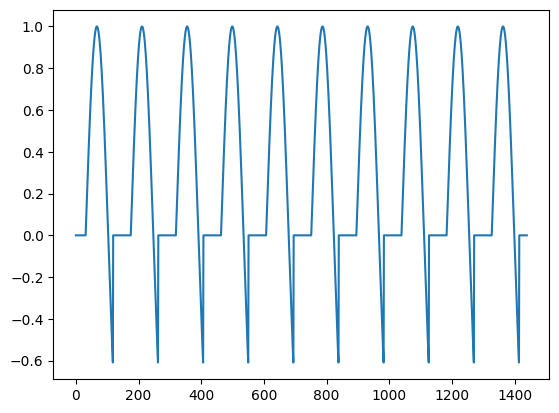

In [54]:
import matplotlib.pyplot as plt

plt.plot(df_total['time_ofDay_sin'].values[:24*60])